In [2]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
path= 'C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug'
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)           


In [4]:
data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])
# data=data[data.NDP >=4]
print(data.shape)
data.head()

(32620, 14)


,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,selected_A1A0_count,selected_A2A0_count,selected_A2A1_count,Protein
0,1433B_MOUSE,DSTLImQLLR,0.940248,0.984135,3,0.63353,0.069347,1.913215e+07,603.33154,0.009964,1.0,1.0,0.0,1433B_MOUSE
1,1433B_MOUSE,AVTEQGHELSNEER,0.962686,0.991361,2,0.47244,0.074061,4.919352e+07,533.58502,0.014380,0.0,1.0,0.0,1433B_MOUSE
2,1433B_MOUSE,LAEQAERYDDMAAAMK,-0.049121,0.541342,4,0.13982,0.119199,1.312825e+08,906.91638,0.085833,3.0,0.0,0.0,1433B_MOUSE
3,1433B_MOUSE,TAFDEAIAELDTLNEESYK,0.937993,0.978693,8,0.39895,0.039049,1.747170e+07,1080.00488,0.016933,3.0,1.0,3.0,1433B_MOUSE
4,1433B_MOUSE,TAFDEAIAELDTLNEESYK,0.874694,0.977430,6,0.27219,0.041255,2.121646e+07,720.33905,0.025580,2.0,3.0,0.0,1433B_MOUSE


In [9]:
temp_nozeroionscore=data[data.NDP >=4]
temp_nozeroionscore=temp_nozeroionscore.dropna()

In [6]:
path= 'C:/Users/hmdebern.UTMB-USERS-M/Desktop/may2testwithioscorezero'
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)           


In [7]:
datazionscore=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    datazionscore=pd.concat([datazionscore,d])
# datazionscore=datazionscore[datazionscore.NDP >=4]
print(datazionscore.shape)
datazionscore.head()

(32620, 14)


,proteinName,peptideSeq,old_Rsquared,new_Rsquared,NDP,rateconstant,sigma,Abundance,MassToCharge,RMSE,selected_A1A0_count,selected_A2A0_count,selected_A2A1_count,Protein
0,1433B_MOUSE,DSTLImQLLR,0.405407,0.842207,8,0.63353,0.500928,1.913215e+07,603.33154,0.109762,1.0,3.0,1.0,1433B_MOUSE
1,1433B_MOUSE,AVTEQGHELSNEER,-0.515961,-0.132980,7,0.47244,0.510142,4.919352e+07,533.58502,0.241501,2.0,1.0,4.0,1433B_MOUSE
2,1433B_MOUSE,LAEQAERYDDMAAAMK,-0.067008,0.388974,5,0.13982,0.087811,1.312825e+08,906.91638,0.086949,3.0,0.0,0.0,1433B_MOUSE
3,1433B_MOUSE,TAFDEAIAELDTLNEESYK,0.937993,0.978693,8,0.39895,0.039049,1.747170e+07,1080.00488,0.016933,3.0,1.0,3.0,1433B_MOUSE
4,1433B_MOUSE,TAFDEAIAELDTLNEESYK,0.636834,0.973459,9,0.27219,0.065604,2.121646e+07,720.33905,0.047914,2.0,1.0,1.0,1433B_MOUSE


In [10]:
temp_withzeroionscore=datazionscore[datazionscore.NDP >=4]
temp_withzeroionscore=temp_withzeroionscore.dropna()

[11622, 11214]

[19526, 10164]

([<matplotlib.axis.XTick at 0x1d236f03a60>,
 [Text(0, 0, '<0.8'), Text(1, 0, '>=0.8')])

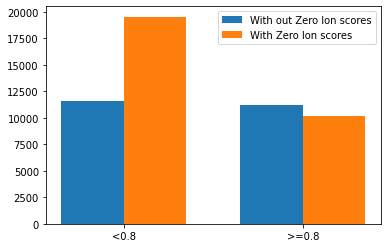

In [18]:
y_nozeroionscore=[temp_nozeroionscore[temp_nozeroionscore.old_Rsquared<0.8].shape[0],
temp_nozeroionscore[temp_nozeroionscore.old_Rsquared>=0.8].shape[0]]

y_zeroionscore=[temp_withzeroionscore[temp_withzeroionscore.old_Rsquared<0.8].shape[0],
temp_withzeroionscore[temp_withzeroionscore.old_Rsquared>=0.8].shape[0]]

labels=["<0.8",">=0.8"]

width = 0.35
x = np.arange(len(labels))
plt.bar(x - width/2 , y_nozeroionscore, width, label='With out Zero Ion scores')
plt.bar(x + width/2, y_zeroionscore, width, label='With Zero Ion scores')
plt.legend()
plt.xticks(x,labels)

([<matplotlib.axis.XTick at 0x1d2371f37c0>,
 [Text(0, 0, 'With out Zero Ion scores'), Text(1, 0, 'With Zero Ion scores')])

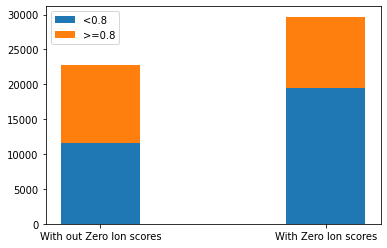

In [26]:
y_nozeroionscore=[temp_nozeroionscore[temp_nozeroionscore.old_Rsquared<0.8].shape[0],
temp_nozeroionscore[temp_nozeroionscore.old_Rsquared>=0.8].shape[0]]

y_zeroionscore=[temp_withzeroionscore[temp_withzeroionscore.old_Rsquared<0.8].shape[0],
temp_withzeroionscore[temp_withzeroionscore.old_Rsquared>=0.8].shape[0]]


lessthanpointeight=[temp_nozeroionscore[temp_nozeroionscore.old_Rsquared<0.8].shape[0],temp_withzeroionscore[temp_withzeroionscore.old_Rsquared<0.8].shape[0]]
greaterthanpointeight=[temp_nozeroionscore[temp_nozeroionscore.old_Rsquared>=0.8].shape[0],temp_withzeroionscore[temp_withzeroionscore.old_Rsquared>=0.8].shape[0]]

# labels=["<0.8",">=0.8"]
labels=["With out Zero Ion scores","With Zero Ion scores"]

width = 0.35
x = np.arange(len(labels))
plt.bar(x , lessthanpointeight, width, label='<0.8')
plt.bar(x , greaterthanpointeight, width, label='>=0.8', bottom=lessthanpointeight)
plt.legend()
plt.xticks(x,labels)

In [27]:
mergeddata=data[["proteinName","peptideSeq","MassToCharge","old_Rsquared","NDP"]].merge(datazionscore[["proteinName","peptideSeq","MassToCharge","old_Rsquared","NDP"]], 
                                                                                  on=["proteinName","peptideSeq","MassToCharge"],suffixes=["_","_zeroIonscore"])

mergeddata["NDP_Diff"]=mergeddata["NDP_zeroIonscore"]-mergeddata["NDP_"]
mergeddata=mergeddata[mergeddata["NDP_Diff"]>0]
mergeddata=mergeddata[mergeddata["NDP_zeroIonscore"]>=4]
print(mergeddata.shape)
mergeddata.fillna(0)
mergeddata.head()

(17855, 8)


,proteinName,peptideSeq,MassToCharge,old_Rsquared_,NDP_,old_Rsquared_zeroIonscore,NDP_zeroIonscore,NDP_Diff
0,1433B_MOUSE,DSTLImQLLR,603.33154,0.940248,3,0.405407,8,5
1,1433B_MOUSE,AVTEQGHELSNEER,533.58502,0.962686,2,-0.515961,7,5
2,1433B_MOUSE,LAEQAERYDDMAAAMK,906.91638,-0.049121,4,-0.067008,5,1
4,1433B_MOUSE,TAFDEAIAELDTLNEESYK,720.33905,0.874694,6,0.636834,9,3
7,1433B_MOUSE,IEAELQDIcNDVLELLDK,1065.53540,-12.238554,8,-0.511575,9,1


In [28]:
mergeddata[(mergeddata["old_Rsquared_"]<mergeddata["old_Rsquared_zeroIonscore"]) & (mergeddata["old_Rsquared_zeroIonscore"]>0.8)]

,proteinName,peptideSeq,MassToCharge,old_Rsquared_,NDP_,old_Rsquared_zeroIonscore,NDP_zeroIonscore,NDP_Diff
24,1433E_MOUSE,IISSIEQKEENKGGEDK,635.32507,0.522406,2,0.853798,9,7
25,1433E_MOUSE,IISSIEQKEENKGGEDK,476.74564,0.934630,5,0.942900,9,4
26,1433E_MOUSE,IISSIEQKEENKGGEDK,952.48395,0.938178,3,0.979771,5,2
28,1433E_MOUSE,AAFDDAIAELDTLSEESYK,1044.48633,0.986783,8,0.988908,9,1
30,1433E_MOUSE,DNLTLWTSDMQGDGEEQNK,1090.97363,0.753336,4,0.817070,5,1
...,...,...,...,...,...,...,...,...
32496,XDH_MOUSE,ITYEDLPAIITIQDAIK,639.69080,0.943166,2,0.966134,9,7
32509,XPO1_MOUSE,LDINLLDNVVNcLYHGEGAQQR,847.75531,0.912059,7,0.923534,8,1
32548,XYLB_MOUSE,ILSTAQRPLE,564.32458,0.967029,7,0.974962,9,2
32569,YBOX1_MOUSE,NYQQNYQNSESGEKNEGSESAPEGQAQQR,1086.47021,0.922485,8,0.927316,9,1


In [29]:
# mergeddata[(mergeddata["old_Rsquared_"]<0.9)&( mergeddata["old_Rsquared_zeroIonscore"]>=0.9)]
# mergeddata[(mergeddata["old_Rsquared_"]<0.9)&( mergeddata["old_Rsquared_zeroIonscore"]>=0.9)]

In [30]:
print(mergeddata[(mergeddata["old_Rsquared_"]<0.5 )&(mergeddata['NDP_']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_"]>=0.5)&(mergeddata['NDP_']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_"]>=0.6)&(mergeddata['NDP_']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_"]>=0.7)&(mergeddata['NDP_']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_"]>=0.8)&(mergeddata['NDP_']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_"]>=0.9)&(mergeddata['NDP_']>=4)].shape)

(4981, 8)
(6005, 8)
(5503, 8)
(4799, 8)
(3851, 8)
(2331, 8)


In [31]:
print(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]<0.5) &(mergeddata['NDP_zeroIonscore']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.5)&(mergeddata['NDP_zeroIonscore']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.6)&(mergeddata['NDP_zeroIonscore']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.7)&(mergeddata['NDP_zeroIonscore']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.8)&(mergeddata['NDP_zeroIonscore']>=4)].shape)
print(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.9)&(mergeddata['NDP_zeroIonscore']>=4)].shape)

(11911, 8)
(5936, 8)
(5005, 8)
(3990, 8)
(2814, 8)
(1440, 8)


([<matplotlib.axis.XTick at 0x1d237452fd0>,
 [Text(0, 0, '<0.5'),
  Text(1, 0, '>=0.5'),
  Text(2, 0, '>=0.6'),
  Text(3, 0, '>=0.7'),
  Text(4, 0, '>=0.8'),
  Text(5, 0, '>=0.9')])

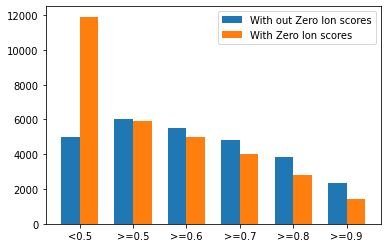

In [32]:
y_nozeroionscore=[(mergeddata[(mergeddata["old_Rsquared_"]<0.5 )&(mergeddata['NDP_']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_"]>=0.5)&(mergeddata['NDP_']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_"]>=0.6)&(mergeddata['NDP_']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_"]>=0.7)&(mergeddata['NDP_']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_"]>=0.8)&(mergeddata['NDP_']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_"]>=0.9)&(mergeddata['NDP_']>=4)].shape[0])]

y_zeroionscore=[(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]<0.5) &(mergeddata['NDP_zeroIonscore']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.5)&(mergeddata['NDP_zeroIonscore']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.6)&(mergeddata['NDP_zeroIonscore']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.7)&(mergeddata['NDP_zeroIonscore']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.8)&(mergeddata['NDP_zeroIonscore']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.9)&(mergeddata['NDP_zeroIonscore']>=4)].shape[0])]

labels=["<0.5",">=0.5",">=0.6",">=0.7",">=0.8",">=0.9"]

width = 0.35
x = np.arange(len(labels))
plt.bar(x - width/2 , y_nozeroionscore, width, label='With out Zero Ion scores')
plt.bar(x + width/2, y_zeroionscore, width, label='With Zero Ion scores')
plt.legend()
plt.xticks(x,labels)

([<matplotlib.axis.XTick at 0x1d2372c5340>,
 [Text(0, 0, '<0.8'), Text(1, 0, '>=0.8')])

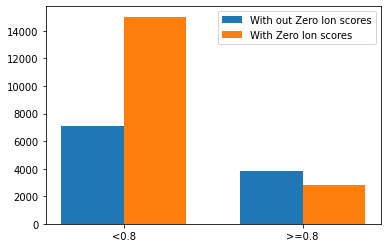

In [33]:
y_nozeroionscore=[
    (mergeddata[(mergeddata["old_Rsquared_"]<0.8 )&(mergeddata['NDP_']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_"]>=0.8)&(mergeddata['NDP_']>=4)].shape[0])]

y_zeroionscore=[(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]<0.8) &(mergeddata['NDP_zeroIonscore']>=4)].shape[0]),
(mergeddata[(mergeddata["old_Rsquared_zeroIonscore"]>=0.8)&(mergeddata['NDP_zeroIonscore']>=4)].shape[0])]

labels=["<0.8",">=0.8"]

width = 0.35
x = np.arange(len(labels))
plt.bar(x - width/2 , y_nozeroionscore, width, label='With out Zero Ion scores')
plt.bar(x + width/2, y_zeroionscore, width, label='With Zero Ion scores')
plt.legend()
plt.xticks(x,labels)

In [34]:
# width = 0.35  # the width of the bars

# x = np.arange(len(labels))
# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2 , y_nozeroionscore, width, label='With out Zero Ion scores')
# rects2 = ax.bar(x + width/2, y_zeroionscore, width, label='With Zero Ion scores')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Scores')
# # ax.set_title('Scores by group and gender')
# ax.set_xticks(x, labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

# fig.tight_layout()

# plt.show()